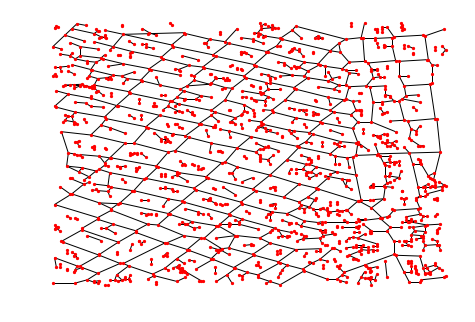

In [15]:
import networkx as nx
import re
import ast

def matchLine(line):
    match = re.match( r'^(.*)\|(.*)$', line)
    left = match.group(1)
    right = match.group(2)
    return (left, ast.literal_eval(left), right)

def createGraphFromFile(filePath):
    G = nx.Graph()
    # Keep track of nodes and edges we have already added
    # TODO: This should be changed to a hashmap for better efficiency. 
    #   Or networkx might have a built-in node membership check
    nodesAdded = []
    edgesAdded = []
    
    # Open the file and start reading line by line
    with open(filePath) as fp:  
        line = fp.readline()
        
        while line:
            # Skip the file header and/or empty lines
            if line[0] != "(":
                line = fp.readline()
                continue
                
            # Match the line to a regex to extract node data
            (parentNode, parentNodeCoords, numEdges) = matchLine(line)
            
            # Add the node to the graph
            if parentNode not in nodesAdded and int(numEdges) != 0:
                nodesAdded.append(parentNode)
                G.add_node(parentNode, pos=parentNodeCoords)
                
            # Add edges to the graph
            for i in range(int(numEdges)):
                line = fp.readline()
                (edgeNode, edgeNodeCoords, meta) = matchLine(line)
                
                if edgeNode not in nodesAdded:
                    nodesAdded.append(edgeNode)
                    G.add_node(edgeNode, pos=edgeNodeCoords)
                    
                # Make sure that the same edge isn't being added twice
                edge = parentNode + edgeNode
                if edge not in edgesAdded:
                    edgesAdded.append(parentNode + edgeNode)
                    edgesAdded.append(edgeNode + parentNode)
                    G.add_edge(parentNode, edgeNode)
            
            line = fp.readline()
    
    return G

G = createGraphFromFile("mapOutputs/TestMap.txt")
nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=5)